In [164]:
#Python and machine learning

In [165]:
import pandas as pd# 数据科学计算工具
import numpy as np# 数值计算工具
import matplotlib.pyplot as plt # 可视化
%matplotlib inline
data=pd.read_csv(r'C:\Users\lenovo\Desktop\diabetes.csv')
print(data.columns)#特征（怀孕次数，血糖，血压，皮脂厚度，胰岛素，BMI身体质量指数，糖尿病遗传函数，年龄，结果）
data.shape

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


(768, 9)

In [166]:
#打印前五行数据
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [167]:
print(data.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


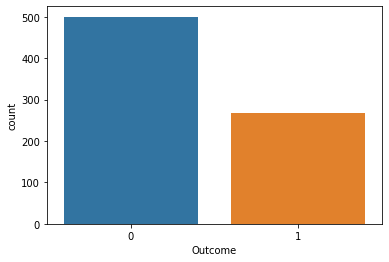

In [168]:
import seaborn as sns
sns.countplot(data['Outcome'],label="Count")

In [169]:
#对数据集进行划分，80%作为训练集，20%作为测试集
from sklearn.model_selection import train_test_split
train_X , test_X , train_y , test_y = train_test_split(data[data.columns[0:8]], data['Outcome'], test_size=0.20, random_state=2)
print(test_y)

158    0
251    0
631    0
757    1
689    1
      ..
733    0
441    0
627    0
84     1
55     0
Name: Outcome, Length: 154, dtype: int64


In [170]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)
knn_y_predict = knn.predict(test_X)

In [171]:
#分别用准确率，召回率，精准率和F1指标来判断机器学习的准确度。
print ('The accuracy of K-Nearest Neighbor Classifier is:{}'.format(knn.score(test_X, test_y))) 
print (classification_report(test_y, knn_y_predict, target_names=['Benign', 'Malignant']))

The accuracy of K-Nearest Neighbor Classifier is:0.7272727272727273
              precision    recall  f1-score   support

      Benign       0.81      0.81      0.81       109
   Malignant       0.53      0.53      0.53        45

    accuracy                           0.73       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.73      0.73      0.73       154



In [172]:
#使用逻辑斯蒂回归对模型进行学习训练。
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(train_X, train_y)
log_y_predict = log.predict(test_X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [173]:
#分别用准确率，召回率，精准率和F1指标来判断机器学习的准确度。
from sklearn.metrics import classification_report
print ('Accuracy of LR Classifier:{}'.format(log.score(test_X, test_y)))
print (classification_report(test_y, log_y_predict, target_names=['Benign', 'Malignant']))

Accuracy of LR Classifier:0.7597402597402597
              precision    recall  f1-score   support

      Benign       0.80      0.89      0.84       109
   Malignant       0.62      0.44      0.52        45

    accuracy                           0.76       154
   macro avg       0.71      0.67      0.68       154
weighted avg       0.75      0.76      0.75       154



In [174]:
#决策树
'''默认值c=1,训练集的准确度可以高达100%，而测试集的准确度相对就差了很多。
这表明决策树是过度拟合的，不能对新数据产生好的效果。因此，我们需要对树进行预剪枝。'''
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=1)
tree.fit(train_X,train_y)
print("Accuracy on training set:{:.3f}".format(tree.score(train_X,train_y)))
print("Accuracy on test set:{:.3f}".format(tree.score(test_X,test_y)))

Accuracy on training set:1.000
Accuracy on test set:0.727


In [175]:
#我们设置max_depth=3，限制树的深度以减少过拟合。这会使训练集的准确度降低，但测试集准确度提高。
tree=DecisionTreeClassifier(max_depth=3,random_state=1)
tree.fit(train_X,train_y)
tree_y_predict = tree.predict(test_X)
print("Accuracy on training set:{:.3f}".format(tree.score(train_X,train_y)))
print("Accuracy on test set:{:.3f}".format(tree.score(test_X,test_y)))

Accuracy on training set:0.780
Accuracy on test set:0.753


In [176]:
#分别用准确率，召回率，精准率和F1指标来判断机器学习的准确度。
from sklearn.metrics import classification_report
print ('Accuracy of DecisionTreeClassifier:{}'.format(tree.score(test_X, test_y)))
print (classification_report(test_y, tree_y_predict, target_names=['Benign', 'Malignant']))

Accuracy of DecisionTreeClassifier:0.7532467532467533
              precision    recall  f1-score   support

      Benign       0.82      0.83      0.83       109
   Malignant       0.58      0.56      0.57        45

    accuracy                           0.75       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.75      0.75      0.75       154



In [177]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.61803652 0.         0.         0.         0.22221
 0.04612535 0.11362814]


In [178]:
#随机森林
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(train_X,train_y)
rf_y_predict = rf.predict(test_X)
print("Accuracy on training set:{:.3f}".format(rf.score(train_X,train_y)))
print("Accuracy on test set:{:.3f}".format(rf.score(test_X,test_y)))

Accuracy on training set:1.000
Accuracy on test set:0.766


In [179]:
from sklearn.metrics import classification_report
print ('Accuracy of RandomForestClassifier:{}'.format(rf.score(test_X, test_y)))
print (classification_report(test_y, rf_y_predict, target_names=['Benign', 'Malignant']))

Accuracy of RandomForestClassifier:0.7662337662337663
              precision    recall  f1-score   support

      Benign       0.82      0.85      0.84       109
   Malignant       0.61      0.56      0.58        45

    accuracy                           0.77       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.76      0.77      0.76       154

